In [2]:
import pandas as pd
import seaborn as sns

In [3]:
# oread_csv문자./krx.csv의미한다
# Symbol같은 경우 앞에 0이 들어가 있기 때문에 숫자로 변환되면서 0이 누락되는 것을 방지하기 위함
df = pd.read_csv('krx.csv', dtype={'Symbol':object})
df.shape

(7181, 10)

In [3]:
df.describe()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
count,7181,7181,7181,2458,2439,2458,2458,2458,2278,2458
unique,7181,3,7181,160,2283,1815,9,2331,2257,22
top,060310,KOSPI,3S,소프트웨어 개발 및 공급업,기업인수합병,1996-07-03,12월,-,http://www.maeil.com,서울특별시
freq,1,5515,1,146,36,8,2397,5,2,997


In [8]:
# True False Condition
# () & ()     () | ()
df[(df['Region'] == '서울특별시') & (df['Market'] == 'KOSPI')]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
48,027410,KOSPI,BGF,기타 금융업,지주회사,2014-05-19,12월,홍정국,http://www.bgf.co.kr,서울특별시
49,282330,KOSPI,BGF리테일,종합 소매업,체인화 편의점,2017-12-08,12월,이건준,http://www.bgfretail.com,서울특별시
51,001460,KOSPI,BYC,봉제의복 제조업,"메리야스,란제리 제조,도매/건축공사/부동산 임대,분양,공급",1975-06-02,12월,김 대 환,http://home.byc.co.kr,서울특별시
...,...,...,...,...,...,...,...,...,...,...
7162,079980,KOSPI,휴비스,화학섬유 제조업,"합성섬유(폴리에스테르원사,원면),재생섬유,폴리에스텔 원사,원면,고상칩 제조,도소매",2012-02-23,12월,신유동,http://www.huvis.com,서울특별시
7165,005010,KOSPI,휴스틸,1차 철강 제조업,"강관(배관용,구조용,유정용) 제조,도매",1973-06-29,12월,박훈,http://www.husteel.com,서울특별시
7170,069260,KOSPI,휴켐스,기타 화학제품 제조업,"화합물,화학제품 제조",2002-10-07,12월,신진용,http://www.huchems.com,서울특별시
7175,000540,KOSPI,흥국화재,보험업,손해보험,1974-12-05,12월,권중원,http://www.insurance.co.kr,서울특별시


In [9]:
# loc : Field Filtering
df.loc[(df['Region'] == '서울특별시') & (df['Market'] == 'KOSPI'), ['Symbol', 'Name']]

,Symbol,Name
1,095570,AJ네트웍스
2,006840,AK홀딩스
48,027410,BGF
49,282330,BGF리테일
51,001460,BYC
...,...,...
7162,079980,휴비스
7165,005010,휴스틸
7170,069260,휴켐스
7175,000540,흥국화재


In [10]:
# 변수에 담아서
seoul = df['Region'] == '서울특별시'
kospi = df['Market'] == 'KOSPI'

df.loc[seoul & kospi, ['Symbol', 'Name']]

,Symbol,Name
1,095570,AJ네트웍스
2,006840,AK홀딩스
48,027410,BGF
49,282330,BGF리테일
51,001460,BYC
...,...,...
7162,079980,휴비스
7165,005010,휴스틸
7170,069260,휴켐스
7175,000540,흥국화재


In [14]:
df['ListingDate'] = pd.to_datetime(df['ListingDate'])
df['ListingYear'] = df['ListingDate'].dt.year
df['ListingYear'].tail()

# year가 float인 이유는 NaN이 float이기 때문이다

7176       NaN
7177       NaN
7178    1976.0
7179    2000.0
7180    2017.0
Name: ListingYear, dtype: float64

In [15]:
import numpy as np
type(np.nan)

float

In [4]:
df['Market'].value_counts()

KOSPI     5515
KOSDAQ    1532
KONEX      134
Name: Market, dtype: int64

<AxesSubplot:>

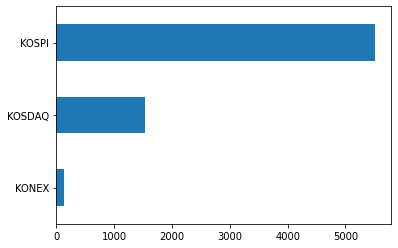

In [4]:
df['Market'].value_counts().sort_values().plot.barh(rot=0)

<AxesSubplot:xlabel='count', ylabel='Market'>

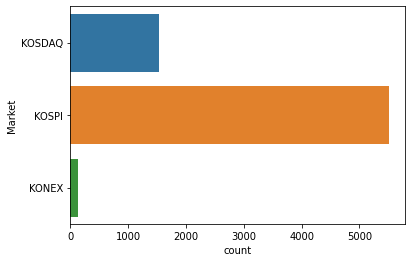

In [19]:
# Sea born의 경우 countplot으로 갯수를 따로 구할필요없다
sns.countplot(data=df, y='Market')